In [3]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from lightgbm import LGBMClassifier
import lightgbm as lgb
import pydotplus
from sklearn import tree

In [4]:
df=pd.read_csv('df_RFE_6Class_LOF.csv')
df2=df.drop(columns=['Unnamed: 0','label'])

In [5]:
X = df2.values
y = np.array(df['label'])

In [6]:
test = pd.read_csv('df_RFE_test.csv')
test2=test.drop(columns=['Unnamed: 0','label'])

In [2]:
!pip install xgboost

In [7]:
Xtest= test2.values
ytest = np.array(test['label'])

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X_train = scaler.transform(X)
X_test = scaler.transform(Xtest)

# Gradient Boosting

In [ ]:
clf = GradientBoostingClassifier(n_estimators=60, learning_rate=0.1, max_depth=3, random_state=0)
clf.fit(X, y)

y_pred = clf.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred))
print('F1-score %s' % f1_score(ytest, y_pred, average=None))
print(classification_report(ytest, y_pred))

Accuracy 0.9073634204275535
F1-score [0.92337536 0.86560847 0.9225     0.85079365 0.87534122 1.        ]
              precision    recall  f1-score   support

           1       0.89      0.96      0.92       496
           2       0.86      0.87      0.87       471
           3       0.97      0.88      0.92       420
           4       0.89      0.82      0.85       491
           5       0.85      0.90      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.91      0.90      0.91      2947
weighted avg       0.91      0.91      0.91      2947



In [ ]:
#CROSS
cvgb = cross_val_score(clf, X , y, cv = 10)
print("Accuracy of hgb: {:.2f} %".format(cvgb.mean()*100))
print("SD of hgb: {:.2f} %".format(cvgb.std()*100))

Accuracy of hgb: 92.81 %
SD of hgb: 3.37 %


#Hist Gradient Boosting

In [ ]:
clf2 = HistGradientBoostingClassifier(learning_rate=0.1, max_depth=2, random_state=0, min_samples_leaf=50)
clf2.fit(X, y)

y_pred2 = clf2.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred2))
print('F1-score %s' % f1_score(ytest, y_pred2, average=None))
print(classification_report(ytest, y_pred2))

Accuracy 0.9148286392941974
F1-score [0.93346574 0.87941788 0.91831683 0.86638831 0.88479263 1.        ]
              precision    recall  f1-score   support

           1       0.92      0.95      0.93       496
           2       0.86      0.90      0.88       471
           3       0.96      0.88      0.92       420
           4       0.89      0.85      0.87       491
           5       0.87      0.90      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.91      0.91      2947
weighted avg       0.92      0.91      0.91      2947



In [ ]:
#CROSS
cvhgb = cross_val_score(clf2, X , y, cv = 10)
print("Accuracy of hgb: {:.2f} %".format(cvhgb.mean()*100))
print("SD of hgb: {:.2f} %".format(cvhgb.std()*100))

Accuracy of hgb: 94.02 %
SD of hgb: 3.86 %


# XGBOOST

In [ ]:
clf3 = XGBClassifier(learning_rate=0.1,
                    n_estimators=100,
                    max_depth=5,
                    min_child_weight=2,
                    gamma=0,
                     reg_lambda=1,
                    objective='multi:softmax',
                     tree_method='exact',
                    seed=27)

clf3.fit(X, y)

y_pred = clf3.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_pred))
print('F1-score %s' % f1_score(ytest, y_pred, average=None))
print(classification_report(ytest, y_pred))

C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:41:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 0.9192399049881235
F1-score [0.93787575 0.8992731  0.9253366  0.86266094 0.88468468 1.        ]
              precision    recall  f1-score   support

           1       0.93      0.94      0.94       496
           2       0.88      0.92      0.90       471
           3       0.95      0.90      0.93       420
           4       0.91      0.82      0.86       491
           5       0.85      0.92      0.88       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [ ]:
#CROSS
cvxg = cross_val_score(clf3, X , y, cv = 10)
print("Accuracy of hgb: {:.2f} %".format(cvxg.mean()*100))
print("SD of hgb: {:.2f} %".format(cvxg.std()*100))

C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:38:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:39:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of hgb: 92.63 %
SD of hgb: 3.77 %


In [ ]:
param_test2 = {
 'max_depth':[3,5,7,9],
 'min_child_weight':[1,2,3,4,5,6]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=100, max_depth=5,
 min_child_weight=2, gamma=0,
 objective= 'multi:softmax',seed=27),
 param_grid = param_test2, scoring='roc_auc',n_jobs=-1, cv=5)
gsearch2.fit(X,y)
gsearch2.best_params_, gsearch2.best_score_

C:\Users\maria\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan]
  warnings.warn(
C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:50:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


({'max_depth': 3, 'min_child_weight': 1}, nan)

In [ ]:
getTrainScores(gsearch2)

({0: "mean:nanparams{'max_depth': 3, 'min_child_weight': 1}",
  1: "mean:nanparams{'max_depth': 3, 'min_child_weight': 2}",
  2: "mean:nanparams{'max_depth': 3, 'min_child_weight': 3}",
  3: "mean:nanparams{'max_depth': 3, 'min_child_weight': 4}",
  4: "mean:nanparams{'max_depth': 3, 'min_child_weight': 5}",
  5: "mean:nanparams{'max_depth': 3, 'min_child_weight': 6}",
  6: "mean:nanparams{'max_depth': 5, 'min_child_weight': 1}",
  7: "mean:nanparams{'max_depth': 5, 'min_child_weight': 2}",
  8: "mean:nanparams{'max_depth': 5, 'min_child_weight': 3}",
  9: "mean:nanparams{'max_depth': 5, 'min_child_weight': 4}",
  10: "mean:nanparams{'max_depth': 5, 'min_child_weight': 5}",
  11: "mean:nanparams{'max_depth': 5, 'min_child_weight': 6}",
  12: "mean:nanparams{'max_depth': 7, 'min_child_weight': 1}",
  13: "mean:nanparams{'max_depth': 7, 'min_child_weight': 2}",
  14: "mean:nanparams{'max_depth': 7, 'min_child_weight': 3}",
  15: "mean:nanparams{'max_depth': 7, 'min_child_weight': 4}",
  

In [ ]:
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 4, 'min_child_weight': 1}, nan)

In [ ]:
param_test2 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch2 = GridSearchCV(estimator = clf3, param_grid = param_test2, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=3)
gsearch2.fit(X, y)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


C:\Users\maria\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:35:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     enable_categorical=False, gamma=0,
                                     gpu_id=-1, importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=100, n_jobs=16,
                                     num_parallel_tree=1,
                                     objective='multi:softprob',
                                     predictor='auto', random_state=27,
                                     reg_alpha=0, reg_lambda=1,
                      

In [ ]:
getTrainScores(gsearch2)

({0: "mean:0.9123220821964954params{'reg_alpha': 1e-05}",
  1: "mean:0.9124642891982665params{'reg_alpha': 0.01}",
  2: "mean:0.9134590717100165params{'reg_alpha': 0.1}",
  3: "mean:0.915164768048686params{'reg_alpha': 1}",
  4: "mean:0.9030850497239779params{'reg_alpha': 100}"},
 {'best_mean': 0.915164768048686, 'best_param': {'reg_alpha': 1}})

In [ ]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [ ]:
from xgboost import plot_tree

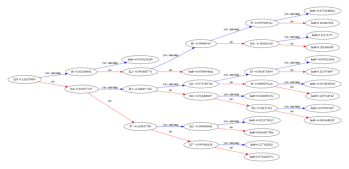

In [ ]:
#plot single tree
plot_tree(clf3, num_trees=3,rankdir='LR')
plt.show()

# LIGHTGBM

In [ ]:
clf = LGBMClassifier(boosting_type='gbdt',  #'goss', #'dart'
                     max_depth=7, # no limit
                     num_leaves=8,
                     n_estimators=50,
                     subsample_for_bin=20000,
                     objective='muticlass',
                     reg_alpha=4, #L1 regularization term on weights
                     reg_lambda=3, #L2 regularization term on weights
                     random_state=42,
                     learning_rate=0.2,
                     bagging_freq=5,
                     #bagging_fraction=0.75,
                     feature_fraction=0.8,

                   )
clf.fit(X, y)

y_predli = clf.predict(Xtest)

print('Accuracy %s' % accuracy_score(ytest, y_predli))
print('F1-score %s' % f1_score(ytest, y_predli, average=None))
print(classification_report(ytest, y_predli))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
Accuracy 0.9226331862911435
F1-score [0.93625498 0.89326425 0.91831683 0.88278775 0.89881495 0.99906803]
              precision    recall  f1-score   support

           1       0.93      0.95      0.94       496
           2       0.87      0.92      0.89       471
           3       0.96      0.88      0.92       420
           4       0.92      0.85      0.88       491
           5       0.87      0.93      0.90       532
           6       1.00      1.00      1.00       537

    accuracy                           0.92      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.92      0.92      2947



In [ ]:
#CROSS
cvl = cross_val_score(clf, X , y, cv = 10)
print("Accuracy of hgb: {:.2f} %".format(cvl.mean()*100))
print("SD of hgb: {:.2f} %".format(cvl.std()*100))

[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 w

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

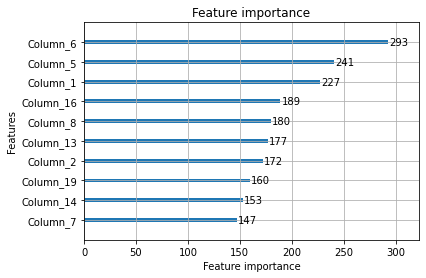

In [ ]:
lgb.plot_importance(clf, max_num_features=10, )

<AxesSubplot:>

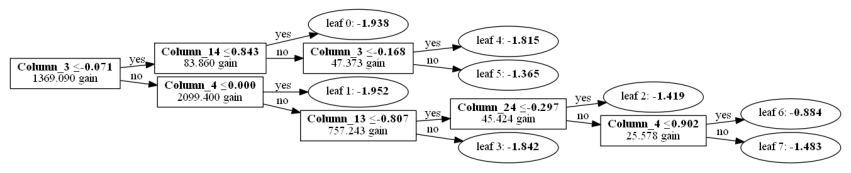

In [ ]:
lgb.plot_tree(clf, tree_index=3, figsize=(15, 15), show_info=['split_gain'])

In [ ]:
import pydotplus
from sklearn import tree

In [ ]:
print('Model test Score: %.3f, ' %clf.score(Xtest, ytest),
      'Model training Score: %.3f' %clf.score(X, y))

Model test Score: 0.923,  Model training Score: 0.997
